In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [20]:
# Definimos la discretización para el tiempo
Tmin, Tmax, Npoints = 0.,10., 101
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)

0.1


In [21]:
S0 = 1
I0 = 2

S = np.zeros(Npoints)
I = np.zeros(Npoints)

S[0] = S0
I[0] = I0

In [23]:
for i in tqdm(range(1,Npoints)):
    S[i] = S[i-1] + (2*S[i-1] -I[i-1])*deltat
    I[i] = I[i-1] + (S[i-1] +2*I[i-1]  )*deltat

100%|██████████| 100/100 [00:00<00:00, 100007.25it/s]


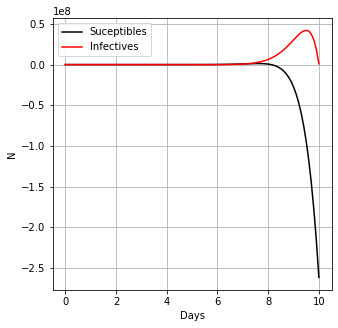

In [24]:
plt.figure(figsize=(5,5))
plt.plot(t,S, c='k',label='Suceptibles')
plt.plot(t,I, c='r',label='Infectives')
plt.ylabel('N')
plt.xlabel('Days')
plt.legend(loc=0)
plt.grid()
plt.savefig('Covid.pdf')
plt.show()

# Integrar en el esquema Runge-Kutta

In [25]:
def f1(S,I,beta,gamma):
    return 2*S -I
def f2(S,I,beta,gamma):
    return S+2*I

In [26]:
Func = [lambda S, I, beta, gamma: 2*S -I,
         lambda S, I, beta, gamma: S+2*I]

In [27]:
Inicial = [S0,I0]

In [28]:
def GetRungeKutta4(Inicial, h):
    
    S = np.zeros([Npoints])
    I = np.zeros([Npoints])
    
    S[0] = Inicial[0]
    I[0] = Inicial[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    for i in tqdm(range(1,Npoints)):
        
        #for j in range(len(Inicial)):
         #   K1[j] = h*Func[j](S[i-1], I[i-1], beta, gamma)
         #   K2[j] = h*Func[j](S[i-1] +0.5*K1[0], I[i-1] +0.5*K1[1],beta,gamma)
         #   K3[j] = h*Func[j](S[i-1] +0.5*K2[0], I[i-1] +0.5*K2[1],beta,gamma)
         #   K4[j] = h*Func[j](S[i-1] +K3[0], I[i-1] +K3[1],beta,gamma)
        
        K1[0] = h*f1(S[i-1],I[i-1],beta,gamma)
        K1[1] = h*f2(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = h*f1(S[i-1]+0.5*K1[0],I[i-1]+0.5*K1[1],beta,gamma)
        K2[1] = h*f2(S[i-1]+0.5*K1[0],I[i-1]+0.5*K1[1],beta,gamma)
        
        K3[0] = h*f1(S[i-1]+0.5*K2[0],I[i-1]+0.5*K2[1],beta,gamma)
        K3[1] = h*f2(S[i-1]+0.5*K2[0],I[i-1]+0.5*K2[1],beta,gamma)
        
        K4[0] = h*f1(S[i-1]+K3[0],I[i-1]+K3[1],beta,gamma)
        K4[1] = h*f2(S[i-1]+K3[0],I[i-1]+K3[1],beta,gamma)
        
        S[i] = S[i-1] + (K1[0]+2*K2[0]+2*K3[0]+K4[0])/6.
        I[i] = I[i-1] + (K1[1]+2*K2[1]+2*K3[1]+K4[1])/6.
    
    
    return S,I

In [29]:
Sr, Ir = GetRungeKutta4(Inicial,deltat)

100%|██████████| 100/100 [00:00<00:00, 24991.38it/s]


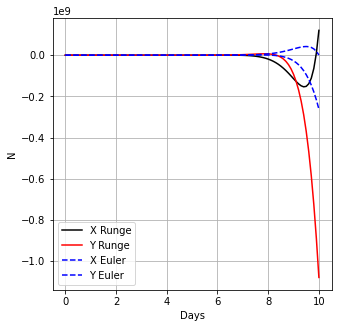

In [31]:
plt.figure(figsize=(5,5))
plt.plot(t,Sr, c='k',label='X Runge')
plt.plot(t,Ir, c='r',label='Y Runge')
plt.plot(t,S,'--',c='b',label='X Euler')
plt.plot(t,I,'--',c='b',label='Y Euler')
plt.ylabel('N')
plt.xlabel('Days')
plt.legend(loc=0)
plt.grid()
plt.savefig('Covid.pdf')
plt.show()

In [12]:
g = 1./10.
#alpha = 0.0000001
alpha = 0.0

In [13]:
I = np.array([ [1,0,0],[0,1,0],[0,0,1] ])
Fout = np.array([ [3./5,0,0],[0,12./20,0],[0,0,2./3] ])
Fin = np.array( [ [0.,5./20.,8./30.],[1./5.,0.,12./30.],[2./5.,7./20.,0.] ])

T = I + alpha*(Fin - Fout)
print(T)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [14]:
Ptot = np.array([50,20,30])
Ia = np.array([0.,0.,1])
Sa = Ptot-Ia
# Numero de Reproduccion
Ra=g*np.array([2.5,2.5,2.5])


# Cantidades Parciales
Sp = np.array([Sa])
Ip = np.array([Ia])
Rp = np.array([Ia])

#Total
St = np.array([np.sum(Sa)])
It = np.array([np.sum(Ia)])
Rt = np.array([np.sum(Ra)])

ttotal = np.array([0.])

In [15]:
TMax = 100
dt = 0.01
t = 0.

while (t <= TMax):
    
    # Mirar el transporte
    
    Sa = np.matmul(T,Sa)
    Ia = np.matmul(T,Ia)
    Ra = np.matmul(T,Ra)
    
    Ptot = Sa+Ia+Ra
    
    Sa += -Ra*Sa*Ia*dt/(Ptot)
    Ia += Ra*Sa*Ia*dt/(Ptot) - Ia*dt*g
    Ra += Ia*dt*g
                    
    t+= dt
    
                        # Evolucion total
    St = np.concatenate((St, [np.sum(Sa)]),axis=0) 
    It = np.concatenate((It, [np.sum(Ia)]),axis=0) 
    Rt = np.concatenate((Rt, [np.sum(Ra)]),axis=0) 
    # Por region
    Sp = np.concatenate((Sp, [Sa]),axis=0)
    Ip = np.concatenate((Ip, [Ia]),axis=0)
    Rp = np.concatenate((Rp, [Ra]),axis=0)
    
    ttotal = np.concatenate((ttotal, [t]), axis=0)

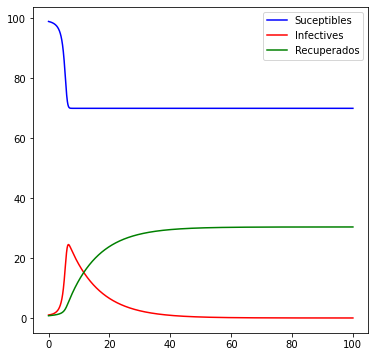

In [16]:
plt.figure(figsize=(6,6))
plt.plot(ttotal,St, c='b',label='Suceptibles')
plt.plot(ttotal,It, c='r',label='Infectives')
plt.plot(ttotal,Rt, c='g',label='Recuperados')
plt.legend(loc=0)
#plt.xlim(40,50)
plt.savefig('covid.png')
plt.show()

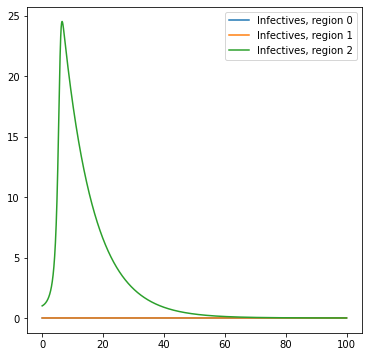

In [17]:
plt.figure(figsize=(6,6))

for i in range(0,3):
    plt.plot(ttotal,Ip[:,i],label='Infectives, region %i' %(i))

    
plt.savefig('infectives.png')
plt.legend(loc=0)